#<h1><center>Lab 3 - A3</center></h1>

## Algoritmi evolutivi

Algoritmul evolutiv pentru problema rucsacului va fi implementat pe baza unei reprezentări binare,
repararea indivizilor care reprezintă soluţii nevalide (pentru a respecta capacitatea rucsacului) şi o
funcţie de fitness ce calculeaza valoarea totală pusă în rucsac (ce trebuie maximizată).
Algoritmul evolutiv pentru problema TSP va fi implementat pe baza unei reprezentări prin permutări,
folosirea unor operatori de încrucișare și mutaţie care generează soluţii valide și o funcţie de fitness
ce calculează distanţa totală parcursă (ce trebuie minimizată).
Componentele algoritmului sunt:
* Generare populaţie iniţială aleator (populaţie P).
* Selecţie părinţi.
* Generare descendenţi: încrucişare şi mutaţie (populaţie O).
* Selecţie supravieţuitori: cei mai buni size(P) din P+O.
* Parametri algoritm: mărimea populaţiei, numărul de generaţii, probabilitatea de încrucişare,
probabilitatea de mutaţie.


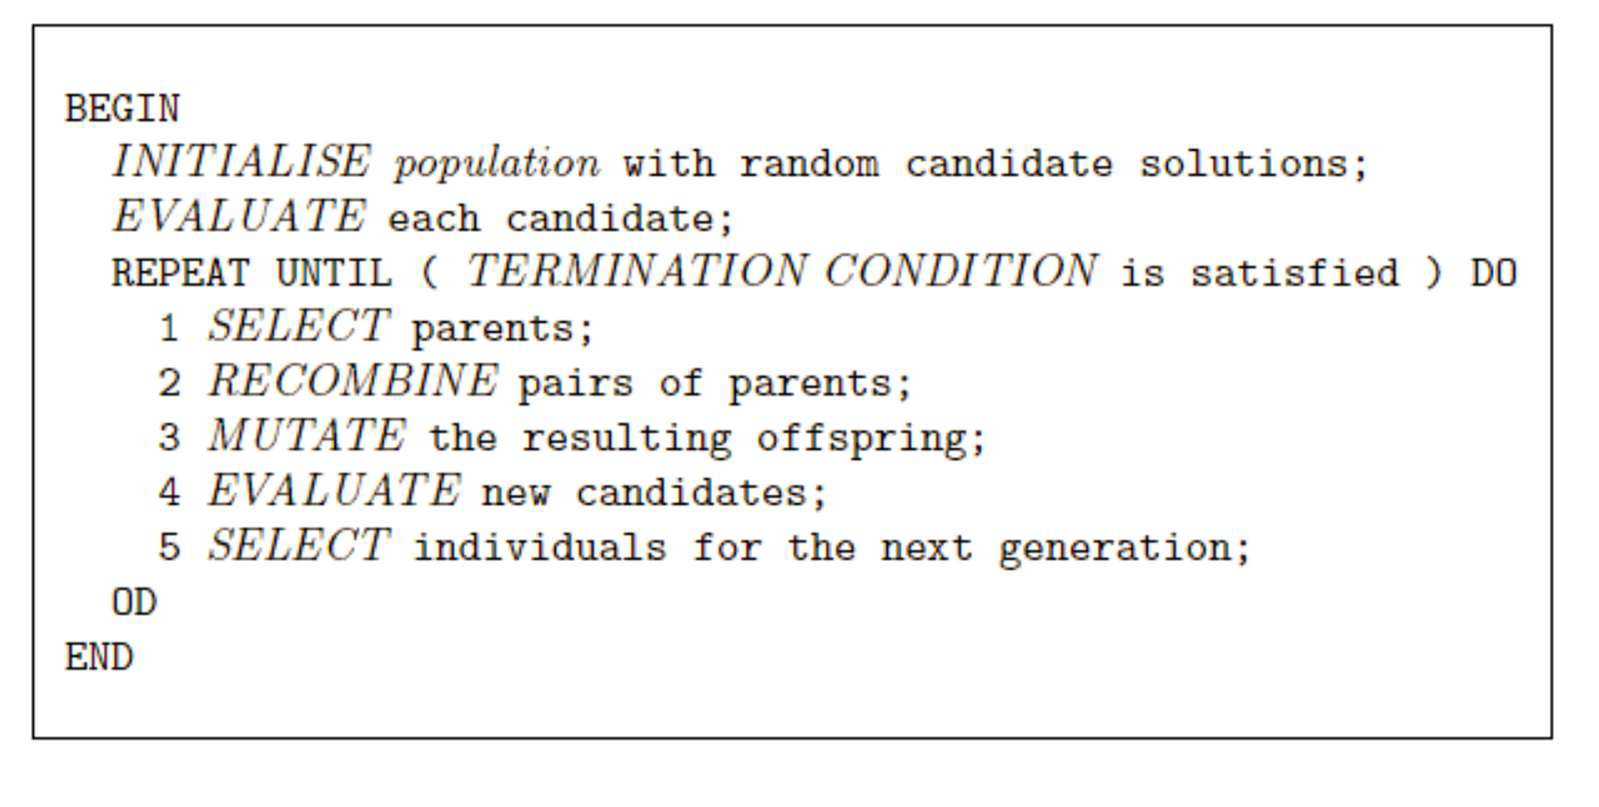

## Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time

##	Lucru în timpul laboratorului

1. Completarea de cod în fișierul Jupyter Notebook (A2.ipynb) unde este notat cu TODO:
 1. Selecție părinți pentru (5p)
 1. Selecție generație următoare (5p)
 1. Implementare mutație pentru soluție cu codificare binară (5p)
 1. Implementare încrucișare pentru soluție cu codificare binară (10p)
 1. Completare algoritm evolutiv pentru codificare binară (15p)
 1. Implementare mutație pentru soluție cu codificare prin permutări (5p)
 1. Implementare încrucișare pentru soluție cu codificare prin permutări (10p)
 1. Completare algoritm evolutive pentru codificare prin permutări (15p)
 1. Implementare funcție pentru codificare reală (5p)

**Total Punctaj A3-Lab = 75p**

**Deadline Lab 3**

### Funcții problema rucsacului

#### Încărcare de date

In [ ]:
# definire încărcare date
def load_data_rucsac(file_name: str) -> "tuple[list[tuple[int, int]], int]":
  """
  Citeste datele din fisierul file_name
  """
  weights_and_values = []
  with open(file_name) as f:
    nr_obj = int(f.readline())
    for i in range(nr_obj):
      line = f.readline()
      line = line.split(" ")
      line = [x for x in line if x != ""]
      weights_and_values.append(tuple(int(x) for x in line[1:]))
    max_capacity = int(f.readline())
  return weights_and_values, max_capacity
#load_data_rucsac("../content/rucsac-200.txt") # rucsac-20.txt and rucsac-200.txt

#### Formarea unei soluții, vecinătate și fitness

In [ ]:
# definire funcții de fitness/evaluare și generare

def is_valid_rucsac(objects: list, sol: list, max_capacity: int):
  """
  Verifica validitatea unei solutii
  """
  weight = 0
  i = 0
  while i < len(sol) and weight <= max_capacity:
    weight += objects[i][1] * sol[i]
    i += 1
  return weight <= max_capacity

def random_neighbor_rucsac(sol: list):
  """
  Generează un vecin aleatoriu pentru o soluție
  """
  x = sol[:]
  index = np.random.randint(len(sol))
  x[index] = 1 - x[index]
  return x

def generate_solution_rucsac(n: int):
  """
  Genereaza o solutie aleatoare
  """
  return list(np.random.randint(2, size=n))


def generate_valid_solution_rucsac(n: int, objects: list, max_capacity: int):
  """
  Genereaza o solutie valida aleatoare
  INPUT
  ------
  n: numarul de obiecte
  objects: obiectele care pot fi adăugate în rucsac
  max_capacity: capacitatea maximă a rucsacului
  OUTPUT
  ------
  sol: soluția generată
  """
  stop = False
  sol = []
  while not stop:
    sol = generate_solution_rucsac(n)
    stop = is_valid_rucsac(objects, sol, max_capacity)
  return sol

def fitness_rucsac(objects: list, sol: list, max_capacity: int):
  """
  Evaluează o soluție pentru problema rucsacului.
  INPUT
  ------
  objects: obiectele care pot fi adăugate în rucsac
  sol: solutția drept o listă de 0 și 1 de lungimea numărului de obiecte
  max_capacity: capacitatea maximă a rucsacului
  OUTPUT
  ------
  value: valoarea tutoror obiectelor care au fost adăugate în rucsac
        sau -1 dacă greutatea obiectelor trece peste greutatea maximă permisă
  """
  value = 0
  if not is_valid_rucsac(objects, sol, max_capacity):
    return -1

  for i in range(len(sol)):
      value += objects[i][0] * sol[i]
  return value

# Cod pentru testarea funcțiilor pentru rucsac
# o, m = load_data_rucsac("../content/rucsac-200.txt")
# sol = generate_valid_solution_rucsac(len(o), o, m)
# print(sol)
# print(fitness_rucsac(o, sol, m))
# n = random_neighbor_rucsac(sol)
# print(n)
# print(fitness_rucsac(o, n, m))

### Funcții TSP

#### Încărcare de date

In [ ]:
def read_from_file_TSP(name: str) -> "tuple[list[tuple], int]":
  """
  Citeste datele din fisierul name pentru problema TSP
  INPUT
  -----
  name: numele fisierului
  OUTPUT
  ------
  locations: lista de locații sub forma (index, x, y)
  dimension: dimensiunea problemei
  """
  locations = []
  dimension = 0
  with open(name, 'r') as file:
    for i in range(6):
      line = file.readline()
      line = line.replace("\n", "")
      line = line.split(" ")
      if len(line) == 2 and line[0] == "DIMENSION:":
        dimension = int(line[1])
    for i in range(dimension):
      line = file.readline()
      line = line.replace("\n", "")
      line = line.split(" ")
      line = [x for x in line if x != ""]
      locations.append(tuple(int(x) for x in line[:]))
  return locations, dimension

def read_from_file_TSPOpt(name: str):
  """
  Citeste solutia din fisierul name pentru problema TSP
  INPUT
  -----
  name: numele fisierului
  OUTPUT
  ------
  solution: lista de locații sub forma de index
  """
  solution = []
  dimension = 0
  with open(name, 'r') as file:
    for i in range(5):
      line = file.readline()
      line = line.replace("\n", "")
      line = line.split(" ")
      if len(line) == 3 and line[0] == "DIMENSION":
        dimension = int(line[2])
    for i in range(dimension):
      line = file.readline()
      line = line.replace("\n", "")
      solution.append(int(line) - 1)
  return solution

#read_from_file_TSP("../content/kroC100.tsp")
#read_from_file_TSP("/content/kroC100.opt.tour")

#### Formarea unei soluții, vecinătate și fitness

In [ ]:
def distance_matrix_TSP(locations: list):
  """
  Formarea matricei de distanțe pe baza datelor încărcate
  """
  length = len(locations)
  dm = np.zeros([length, length], dtype=int)
  for i in range(length):
    for j in range(i + 1, length):
      xd = locations[i][1] - locations[j][1]
      yd = locations[i][2] - locations[j][2]
      dm[i][j] = int(round(np.sqrt(xd * xd + yd * yd)))
      dm[j][i] = dm[i][j]
  return dm

def generate_solution_TSP(dimension: int):
  """
  Generează o soluție aleatoare pentru problema TSP sub forma unei permutari
  """
  return list(np.random.permutation(dimension))

def fitness_TSP(solution: list, dm: "list[list]"):
  """
  Determina fitness-ul unei soluții pentru problema TSP
  """
  distance = 0
  for i in range(len(solution)):
    if i != len(solution) - 1:
      distance += dm[solution[i]][solution[i + 1]]
    else:
      distance += dm[solution[i]][solution[0]]
  return distance

def two_swap(solution: list, dimension: int):
  """
  Generează un vecin aleatoriu pentru o soluție prin metoda 2-swap
  """
  x = solution[:]
  i = no.random.randint(dimension)
  j = no.random.randint(dimension)
  while j == i:
    j = no.random.randint(dimension)
  x[i], x[j] = x[j], x[ij]
  return x

def two_opt(solution: list, i: int, j: int):
  x = solution[:]
  index = 0
  while i + index < j - index:
    x[i + index], x[j - index] = x[j - index], x[i + index]
    index += 1
  return x

### Algorimi evolutivi

#### Generare populatie

In [ ]:
def generate_rnd_population_knapsack(population_size: int, problem_size: int, objects: "list[tuple]", max_capacity: int):
  """
  Returneaza o populatie de marime population_size pentru problema rucsacului de marime problem_size
  INPUT
  ------
  population_size: marimea populatiei
  problem_size: marimea pentru solutia problemei
  objects: obiectele care pot fi adăugate în rucsac
  max_capacity: capacitatea maximă a rucsacului
  OUTPUT
  ------
  population: populatia noua pentru problema specificata
  """
  population = []
  for i in range(population_size):
    population.append(generate_valid_solution_rucsac(problem_size, objects, max_capacity))
  return population

def generate_rnd_population_TSP(problem_size: int, population_size: int):
  """
  Returneaza o populatie de marime population_size pentru TSP de marime problem_size
  INPUT
  ------
  population_size: marimea populatiei
  problem_size: marimea pentru solutia problemei
  OUTPUT
  ------
  population: populatia noua pentru problema specificata
  """
  population = []
  for i in range(population_size):
    population.append(generate_solution_TSP(problem_size))
  return population

#### Selectie parinti

In [ ]:
#@title Codificare binara
def selection_kanpsack(population: list, population_size: int, objects: "list[tuple]", max_capacity: int):
  """
  Aici se selecteaza un parinte din populatia initiala. Se foloseste selectia turnir de marime 5.
  """
  parents = [None, None]
  p = population[:]  # copie a populatiei initiale
  for i in range(2):
    sample = sorted(np.random.default_rng().choice(population_size, size=5, replace=False),
                    reverse=True)
    possible_parents = [p[s] for s in sample]
    for j in range(len(sample)):
      del p[sample[j]]
    population_size -= 5 # Ne asigurăm că un membru din populație nu e selectat de două ori

    possible_parents = sorted(possible_parents, key=lambda x: fitness_rucsac(objects, x, max_capacity),
                              reverse=True) #* TODO: Înlocuiește None cu valorile corecte
    parents[i] = possible_parents[0] #* TODO: Atribuie cel mai bun părinte
  return parents[0], parents[1] #* TODO: Returnează cei mai buni 2 părinți găsiți în interații diferite

In [ ]:
#@title Codificare prin permutari
def selection_TSP(population: list, population_size: int, dm: "list[list[int]]"):
  """
  Aici se selecteaza un parinte din populatia initiala. Se foloseste selectia turnir de marime 5.
  """
  parents = [None, None]
  p = population[:]  # copie a populatiei initiale
  for i in range(2):
    sample = sorted(np.random.default_rng().choice(population_size, size=5, replace=False),
                    reverse=True)
    possible_parents = [p[s] for s in sample]
    for j in range(len(sample)):
      del p[sample[j]]
    population_size -= 5 # Ne asigurăm că un membru din populație nu e selectat de două ori

    possible_parents = sorted(possible_parents, key=lambda x: fitness_TSP(x, dm),
                              reverse=False) #* TODO: Înlocuiește None cu valorile corecte
    parents[i] = possible_parents[0] #* TODO: Atribuie cel mai bun părinte
  return parents[0], parents[1] #* TODO: Returnează cei mai buni 2 părinți găsiți în interații diferite

#### Incrucisare si mutatie

In [ ]:
#@title Codificare binara

def binary_crossover(population_size: int, population: list, crossover_count: int,
                     objects: "list[tuple]", max_capacity: int):
  """
  Aici se executa un crossover in pentru populație
  INPUT
  -----
  population_size: mărimea populației
  population: populația din care se obțin părinții și copii
  crossover_count: numărul de încrucișări
  objects: obiectele care pot fi adăugate în rucsac
  max_capacity: capacitatea maximă a rucsacului
  OUTPUT
  -----
  children - soluții copil obținute după încrucișare
  """
  children = []
  for i in range(crossover_count):
    parent1, parent2 = selection_kanpsack(population, population_size, objects, max_capacity) #* TODO: Selectare parintii din populatie
    child1, child2 = [], []
    crossover_point = np.random.randint(len(parent1))
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    #* TODO: Aplicare algortim de încrucișare la alegere
    children.append(child1)
    children.append(child2)
  return children

def binary_mutation(children: list, problem_size: int, mutation_rate: float):
  """
  Aici se execută algoritmul de mutație
  """
  mutanted_children = []
  for c in children:
    mutated_child = c[:]
    if np.random.random() < mutation_rate:
      index = np.random.randint(problem_size)
      mutated_child[index] = 1 - mutated_child[index]
      #* TODO: Aplicare algoritm de mutație la alegere
    mutanted_children.append(mutated_child)
  return mutanted_children

In [ ]:
#@title Codificare prin permutari

def permutation_crossover(population_size: int, population: list, crossover_count: int,
                          dm: "list[list[int]]"):
  """
  Aici se executa un crossover in pentru populație
  INPUT
  -----
  population_size: mărimea populației
  population: populația din care se obțin părinții și copii
  crossover_count: numărul de încrucișări
  dm: matricea de distanțe
  OUTPUT
  -----
  children - soluții copil obținute după încrucișare
  """
  children = []
  for i in range(crossover_count):
    parent1, parent2 = selection_TSP(population, population_size, dm)#* TODO: Selectare parintii din populatie
    child1, child2 = [], []
    crossover_point = np.random.randint(len(parent1))
    child1 = parent1[:crossover_point] + [x for x in parent2 if x not in parent1[:crossover_point]]
    child2 = parent2[:crossover_point] + [x for x in parent1 if x not in parent2[:crossover_point]]
    #* TODO: Aplicare algortim de încrucișare la alegere
    children.append(child1)
    children.append(child2)
  return children

def permutation_mutation(children: list, problem_size: int, mutation_rate: float):
  """
  Aici se execută algoritmul de mutație
  """
  mutanted_children = []
  for c in children:
    mutated_child = c[:]
    if np.random.random() < mutation_rate:
      i = np.random.randint(problem_size)
      j = np.random.randint(problem_size)
      while j == i:
        j = np.random.randint(problem_size)
      mutated_child[i], mutated_child[j] = mutated_child[j], mutated_child[i]
      #* TODO: Aplicare algoritm de mutație la alegere
    mutanted_children.append(mutated_child)
  return mutanted_children

#### Populatia urmatoare

In [ ]:
#@title Codificare binara
def make_it_valid_rucsac(objects: "list[tuple]", sol: "list[int]", max_capacity: int):
  """
  Transformarea unei solutii invalide intr-o solutie valida
  """
  length = len(sol)
  repaired_solution = sol[:]
  i = 0
  while i < length:
    if repaired_solution[i] == 1:
        repaired_solution[i] = 0
    if is_valid_rucsac(objects, repaired_solution, max_capacity):
        return repaired_solution
    i += 1
  return repaired_solution # Returnează soluția corectată în caz că nu s-a făcut în while

def new_population_rucsac(old_population: list, mutated_children: list, objects: "list[tuple]", max_capacity: int):
    """
    Genereaza o populatie noua dupa urmatoarele reguli:
    -se pastreaza toti copiii obtinuti dupa mutatie
    -locurile libere din populatie se vor umple cu parintii ramasi
    """
    population = []
    mc = mutated_children[:]
    for i in range(len(mc)):
        if not is_valid_rucsac(objects, mc[i], max_capacity):
            mc[i] = make_it_valid_rucsac(objects, mc[i], max_capacity) #* TODO: Folosiți funcția de mai sus pentru corectare
    population = old_population + mc
    population = sorted(population, key=lambda x: fitness_rucsac(objects, x, max_capacity), reverse=True ) #* TODO: Sortarea populației în funcție de fitness
    population = population[:len(old_population)] # Reducerea poulației la cele mai bune valori
    return population

In [ ]:
#@title Codificare prin permutari
def new_population_TSP(old_population: list, mutated_children: list, dm: "list[list[int]]"):
    """
    Genereaza o populatie noua dupa urmatoarele reguli:
    -se pastreaza toti copiii obtinuti dupa mutatie
    -locurile libere din populatie se vor umple cu parintii ramasi
    """
    population = []
    mc = mutated_children[:]
    population = old_population + mc
    population = sorted(population, key=lambda x: fitness_TSP(x, dm)) #* TODO: Sortarea populației în funcție de fitness
    population = population[:len(old_population)] # Reducerea poulației la cele mai bune valori
    return population

#### Structura de baza a algoritmului evolutiv

In [ ]:
#@title Codificare binara
def evaluate_population_knapsack(population_size: int, population: list, problem_size: int, objects: "list[tuple]", max_capacity: int):
  """
  Evaluarea populatiei si returnarea best, average si worst fitness
  """
  best, avg, worst = 0, 0, 0
  eval_population = sorted(population, key=lambda x: fitness_rucsac(objects, x, max_capacity), reverse=True)
  best = fitness_rucsac(objects, eval_population[0], max_capacity)
  avg = avg = sum(fitness_rucsac(objects, x, max_capacity) for x in population) / population_size
  worst = fitness_rucsac(objects, eval_population[-1], max_capacity)
  return best, avg, worst

def evolutionary_algorithm_knapsack(population_size: int, mutation_rate: float, crossover_rate: float, generations: int,
                                    problem_size: int, objects: "list[tuple]", max_capacity: int):
  """
  Aceasta functie executa un algoritm evolutiv
  INPUT
  -----
  population_size: marimea populatiei pe parcursul problemei
  mutation_rate: rata de mutatie (sansele de a face mutatii asupra unei solutii)
  crossover_rate: rata populatiei obtinute din crossover (nu va afecta obtinerea populatiei initiale)
  generations: numarul de generatii parcurse de algoritm pana la stop
  problem_size: marimea problemei (adica cat de lungi o sa fie solutiile obtinute)
  objects: obiectele care pot fi adăugate în rucsac
  max_capacity: capacitatea maximă a rucsacului
  OUTPUT
  ------
  best: cele mai bune fitness-uri din populatie
  avg: valoarile medii pentru fitness-urile populatie
  worst: cele mai slabe fitness-uri din populatie
  """
  population = generate_rnd_population_knapsack(population_size, problem_size, objects, max_capacity) #* TODO: Apelare algoritm pentru generarea popuției inițiale
  b, a, w = evaluate_population_knapsack(population_size, population, problem_size, objects, max_capacity) #* TODO: Apelare algoritm de evaluare a problemei
  best = [b]
  avg = [a]
  worst = [w]
  crossover_count = int((population_size * crossover_rate) // 2)
  for i in range(generations):
    mutants = []
    children = binary_crossover(population_size, population, crossover_count, objects, max_capacity) #* TODO: Apelare algoritm de încrucișare
    mutants = binary_mutation(children, problem_size, mutation_rate) #* TODO Apelare algoritm de mutație
    population = new_population_rucsac(population, mutants, objects, max_capacity) #* TODO: Apelare algoritm pentru generația nouă new_population(problem_type, population, mutants, evaluator)
    b, a, w = evaluate_population_knapsack(population_size, population, problem_size, objects, max_capacity) #* TODO: Apelare algoritm de evaluare a problemei
    best.append(b)
    avg.append(a)
    worst.append(w)
  return best, avg, worst

In [ ]:
#@title Codificare prin permutari
def evaluate_population_TSP(population_size: int, population: list, problem_size: int, dm: "list[list[int]]"):
  """
  Evaluarea populatiei si returnarea best, average si worst fitness
  """
  best, avg, worst = 0, 0, 0
  eval_population = sorted(population, key=lambda x: fitness_TSP(x, dm), reverse=True)
  best = fitness_TSP(eval_population[0], dm)
  avg = sum(fitness_TSP(x, dm) for x in population) / population_size
  worst = fitness_TSP(eval_population[-1], dm)
  return best, avg, worst

def evolutionary_algorithm_tsp(population_size: int, mutation_rate: float, crossover_rate: float, generations: int,
                               problem_size: int, dm: "list[list[int]]"):
  """
  Aceasta functie executa un algoritm evolutiv
  INPUT
  -----
  population_size: marimea populatiei pe parcursul problemei
  mutation_rate: rata de mutatie (sansele de a face mutatii asupra unei solutii)
  crossover_rate: rata populatiei obtinute din crossover (nu va afecta obtinerea populatiei initiale)
  generations: numarul de generatii parcurse de algoritm pana la stop
  problem_size: marimea problemei (adica cat de lungi o sa fie solutiile obtinute)
  dm: matricea de distante
  OUTPUT
  ------
  best: cele mai bune fitness-uri din populatie
  avg: valoarile medii pentru fitness-urile populatie
  worst: cele mai slabe fitness-uri din populatie
  """
  population = generate_rnd_population_TSP(problem_size, population_size) #* TODO: Apelare algoritm pentru generarea popuției inițiale
  b, a, w =  evaluate_population_TSP(population_size, population, problem_size, dm) #* TODO: Apelare algoritm de evaluare a problemei
  best = [b]
  avg = [a]
  worst = [w]
  crossover_count = int((population_size * crossover_rate) // 2)
  for i in range(generations):
    mutants = []
    children = permutation_crossover(population_size, population, crossover_count, dm) #* TODO: Apelare algoritm de încrucișare
    mutants = permutation_mutation(children, problem_size, mutation_rate) #* TODO Apelare algoritm de mutație
    population = new_population_TSP(population, mutants, dm)  #* TODO: Apelare algoritm pentru generația nouă new_population(problem_type, population, mutants, evaluator)
    b, a, w = evaluate_population_TSP(population_size, population, problem_size, dm) #* TODO: Apelare algoritm de evaluare a problemei
    best.append(b)
    avg.append(a)
    worst.append(w)
  return best, avg, worst

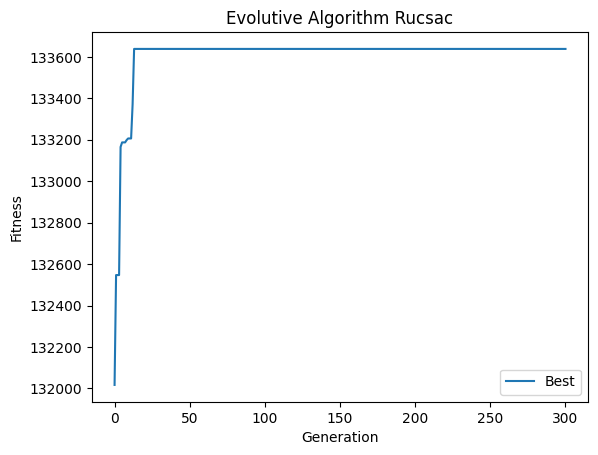

In [ ]:
def plot_rucsac():
  objects, max_capacity = load_data_rucsac("/content/rucsac-200.txt")
  problem_size = len(objects)
  population_size = 100
  mutation_rate = 0.1
  crossover_rate = 0.5
  generations = 300

  best = evolutionary_algorithm_knapsack(population_size, mutation_rate, crossover_rate, generations, problem_size, objects, max_capacity)
  plt.plot(best[0], label="Best")
  plt.title("Evolutive Algorithm Rucsac")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()

plot_rucsac()

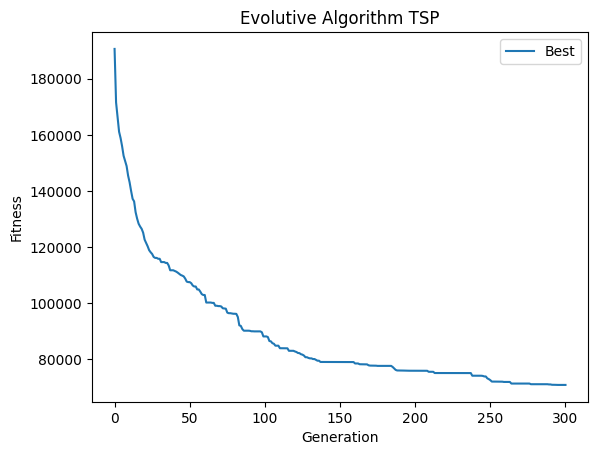

In [ ]:
def plot_tsp():
  locations, dimension = read_from_file_TSP("/content/kroC100.tsp")
  dm = distance_matrix_TSP(locations)
  problem_size = dimension
  population_size = 100
  mutation_rate = 0.1
  crossover_rate = 0.5
  generations = 300

  best, _ , _ = evolutionary_algorithm_tsp(population_size, mutation_rate, crossover_rate, generations, problem_size, dm)
  plt.plot(best, label="Best")
  plt.title("Evolutive Algorithm TSP")
  plt.xlabel("Generation")
  plt.ylabel("Fitness")
  plt.legend()
  plt.show()

plot_tsp()

## A3 - Temă

1. Implementare algoritm evolutive pentru codificare reală(20p):
2. Implementare PSO pentru codificare reală sau ACO pentru TSP (20)
3. Scrierea de documentație drept un Jupyter Notebook sau un document word/pdf (35p)
 * Documentare cod
 * Explicarea funcțiilor pe pași
 * Tabel cu rezultate pentru fiecare instanță a problemei prentru minim 5 valori diferite
de parametri
    * Incluzând tabele cu rezultate pentru algoritmi implementați la lab
 * Vizualizare rezultate între interații
 * Analiza rezultatelor
    * Comparație între toți algoritmii anteriori pentru aceiași problemă

**Total Punctaj A3-Temă= 75p**

**Deadline Lab 4**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math
import time
import random

In [5]:
#@title Functii Codificare Reala
def michalewicz(x, m=10):
    """
    Funcția Michalewicz
    INPUT
    -----
    x: vectorul de soluție
    m: parametru de dificultate (mai mare = mai multe local optima)
    OUTPUT
    -----
    valoarea funcției (de minimizat)
    """
    d = len(x)
    sum_term = 0.0
    for i in range(d):
        sum_term += np.sin(x[i]) * np.sin(((i + 1) * x[i]**2) / np.pi)**(2 * m)
    return -sum_term

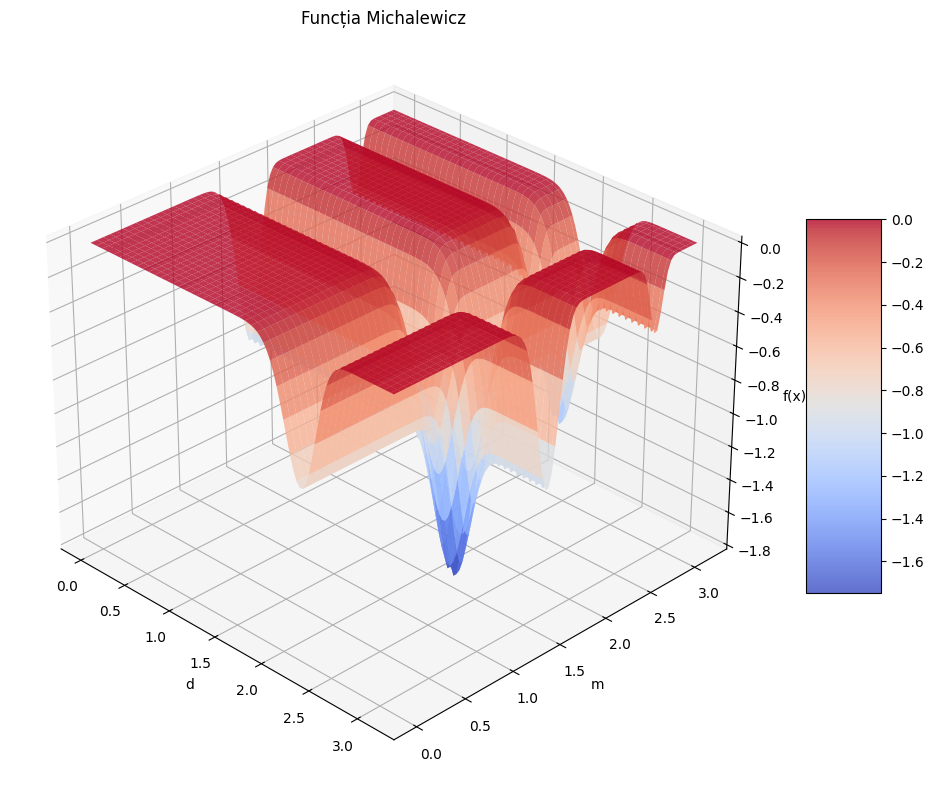

Valoarea minimă d=2, m=10: -1.801077475911499
Valoarea minimă d=10, m=10: -5.648223736680387


In [6]:
# Funcție pentru vizualizare 3D
def plot_michalewicz_3d():
    x = np.linspace(0, np.pi, 100)
    y = np.linspace(0, np.pi, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    # Calcularea valorilor funcției
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i, j] = michalewicz([X[i, j], Y[i, j]])

    # Plot 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.8)

    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_xlabel('d')
    ax.set_ylabel('m')
    ax.set_zlabel('f(x)')
    ax.set_title('Funcția Michalewicz')

    # Ajustare unghi de vizualizare pentru a fi similar cu imaginea
    ax.view_init(elev=30, azim=-45)

    plt.tight_layout()
    plt.show()

    min_val = find_minimum(2)
    print(f"Valoarea minimă d=2, m=10: {min_val}")

    min_val_10 = find_minimum(10)
    print(f"Valoarea minimă d=10, m=10: {min_val_10}")

# Funcție pentru găsirea valorii minime aproximative
def find_minimum(dimension, num_trials=100000):
    best_val = 0
    for _ in range(num_trials):
        x = np.random.uniform(0, np.pi, size=dimension)
        val = michalewicz(x)
        if val < best_val:
            best_val = val
    return best_val

# Rulare vizualizare 3D
plot_michalewicz_3d()

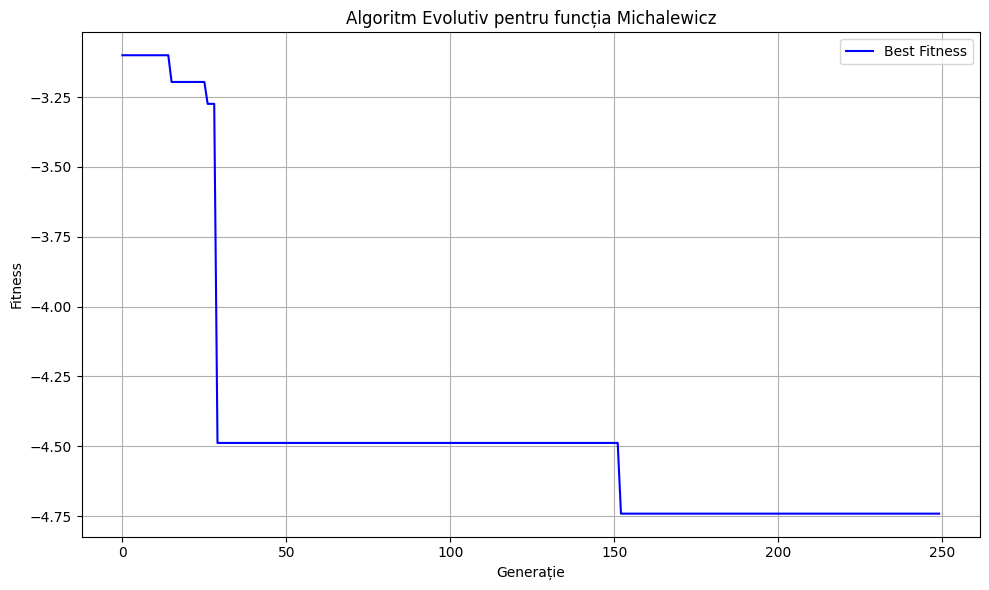

Best solution: [2.49717995 1.56796575 1.1107585  0.58033053 1.67619264 0.87064955
 2.50875444 2.35965413 0.76742721 1.83440463]
Best fitness: -4.741351642100852


In [11]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

def init_population(pop_size, n_vars, lower_bound=0, upper_bound=3.14):
    """
    Initializarea unei populații aleatoare
    """
    return np.random.uniform(lower_bound, upper_bound, (pop_size, n_vars))

def crossover(population, crossover_rate=0.8):
    """
    Functia de crossover
    """
    idx1, idx2 = np.random.choice(len(population), 2, replace=False)

    # Get parents
    p1 = population[idx1]
    p2 = population[idx2]

    # Random alpha between 0.5 and 0.95
    alpha = np.random.uniform(0.5, 0.95)

    # Create children
    child1 = alpha * p1 + (1 - alpha) * p2
    child2 = alpha * p2 + (1 - alpha) * p1

    # Replace parents with children
    population[idx1] = child1
    population[idx2] = child2

    return population

def mutation(population, mutation_rate=0.2):
  """
  Simple but effective mutation that perturbs solutions
  """
  for i in range(len(population)):
      if random.random() < mutation_rate:
          perturbation = np.random.uniform(-0.5, 0.5, size=population[i].shape)
          population[i] = np.clip(population[i] + perturbation, 0, np.pi)
  return population

def evolutionary_algorithm_michalewicz(pop_size, n_vars, generations, crossover_rate=0.8, mutation_rate=0.1, m=10):
    """
    Functie ce ruleaza algoritmul evolutiv pentru problema michalewicz
    """
    population = init_population(pop_size, n_vars)

    best_solution = None
    best_fitness = float('inf')
    fitness_over_time = []

    for gen in range(generations):
        fitness = np.array([michalewicz(individual, m) for individual in population])

        min_fitness_idx = np.argmin(fitness)
        if fitness[min_fitness_idx] < best_fitness:
            best_fitness = fitness[min_fitness_idx]
            best_solution = population[min_fitness_idx].copy()

        fitness_over_time.append(best_fitness)

        population = crossover(population, crossover_rate)

        population = mutation(population, mutation_rate)

    return best_solution, fitness_over_time

n_vars = 10
pop_size = 100
generations = 250
crossover_rate = 0.2
mutation_rate = 0.1
m = 10

best_solution, fitness_over_time = evolutionary_algorithm_michalewicz(
    pop_size, n_vars, generations, crossover_rate, mutation_rate, m
)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(generations), fitness_over_time, label='Best Fitness', color='blue')
plt.xlabel("Generație")
plt.ylabel("Fitness")
plt.title("Algoritm Evolutiv pentru funcția Michalewicz")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Best solution:", best_solution)
print("Best fitness:", min(fitness_over_time))

In [12]:
def evolutionary_michalewicz_n_times(n, pop_size, n_vars, generations, crossover_rate=0.8, mutation_rate=0.1, m=10):
  """
  Ruleaza algoritmul de n ori si returneaza cele mai bune solutii
  """
  best_solutions = []
  average_time = 0
  for _ in range(n):
    start = time.time()
    best_solution, best_fitnesses, = evolutionary_algorithm_michalewicz(pop_size, n_vars, generations, crossover_rate, mutation_rate, m)
    stop = time.time() - start
    average_time = stop
    best_solutions.append((best_solution, best_fitnesses[0]))
  average_time /= n
  return best_solutions, average_time

pop_size = 100
generations = 250
n_vars = 10
crossover_rate = [0.2, 0.5, 0.8]
mutation_rate = [0.1, 0.5]
m = 10
n = 10

markdown_table = "| n_vars | pop_size | generations | crossover_rate | mutation_rate | m | Best Solution | Avg Solution | Avg Time |\n"
markdown_table += "|---|---|---|---|---|---|---|---|---|\n"

for c in crossover_rate:
  for mut in mutation_rate:
        best_results, average_time = evolutionary_michalewicz_n_times(n, pop_size, n_vars, generations, c, mut, m)
        best = max(best_results, key=lambda x: x[1])
        average = sum([x[1] for x in best_results]) / len(best_results)
        markdown_table += f"| {n_vars} | {pop_size} | {generations} | {c} | {mut} | {m} | {best[1]} | {average} | {average_time} |\n"

markdown_table # copy paste intr-o celula de text

'| n_vars | pop_size | generations | crossover_rate | mutation_rate | m | Best Solution | Avg Solution | Avg Time |\n|---|---|---|---|---|---|---|---|---|\n| 10 | 100 | 250 | 0.2 | 0.1 | 10 | -2.73874255959596 | -3.39899973929153 | 0.07483012676239013 |\n| 10 | 100 | 250 | 0.2 | 0.5 | 10 | -2.7364894148930152 | -3.2451106962545326 | 0.09120471477508545 |\n| 10 | 100 | 250 | 0.5 | 0.1 | 10 | -2.7272092275593156 | -3.276505874483729 | 0.09157083034515381 |\n| 10 | 100 | 250 | 0.5 | 0.5 | 10 | -2.435380330728748 | -3.252382011766455 | 0.09013099670410156 |\n| 10 | 100 | 250 | 0.8 | 0.1 | 10 | -2.773358436393313 | -3.5436416022770474 | 0.07828643321990966 |\n| 10 | 100 | 250 | 0.8 | 0.5 | 10 | -2.5992316453140494 | -3.1916512546202807 | 0.09372439384460449 |\n'

| n_vars | pop_size | generations | crossover_rate | mutation_rate | m | Best Solution | Avg Solution | Avg Time |
|---|---|---|---|---|---|---|---|---|
| 10 | 100 | 250 | 0.2 | 0.1 | 10 | -2.73874255959596 | -3.39899973929153 | 0.07483012676239013 |
| 10 | 100 | 250 | 0.2 | 0.5 | 10 | -2.7364894148930152 | -3.2451106962545326 | 0.09120471477508545 |
| 10 | 100 | 250 | 0.5 | 0.1 | 10 | -2.7272092275593156 | -3.276505874483729 | 0.09157083034515381 |
| 10 | 100 | 250 | 0.5 | 0.5 | 10 | -2.435380330728748 | -3.252382011766455 | 0.09013099670410156 |
| 10 | 100 | 250 | 0.8 | 0.1 | 10 | -2.773358436393313 | -3.5436416022770474 | 0.07828643321990966 |
| 10 | 100 | 250 | 0.8 | 0.5 | 10 | -2.5992316453140494 | -3.1916512546202807 | 0.09372439384460449 |


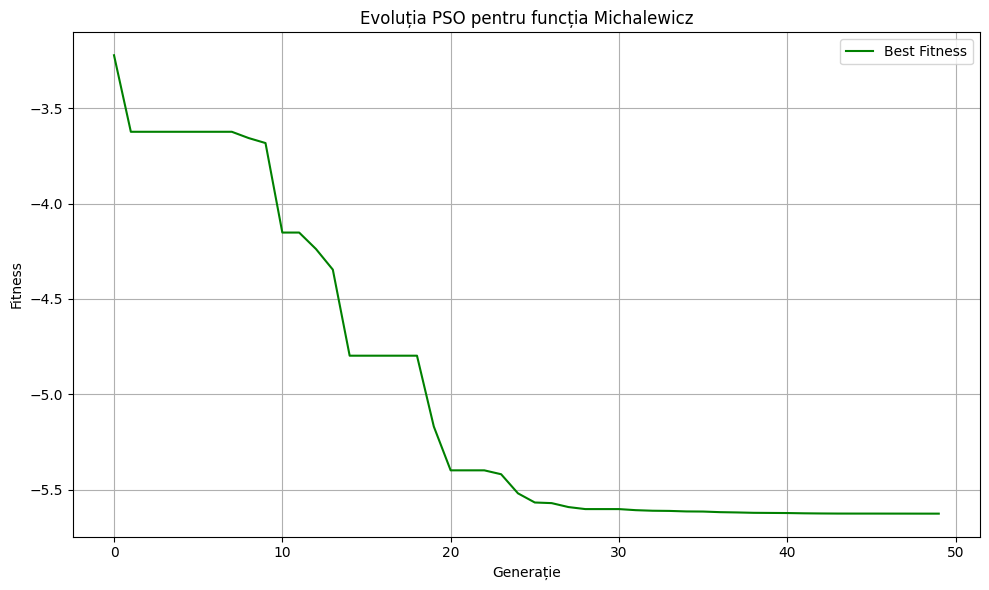

In [21]:
#@title PSO cu Codificare Reala
def init_particle(n_vars, left=0, right=3.14):
    """
    Inițializează o particulă cu valori reale într-un interval specificat
    INPUT
    -----
    n_vars: numărul de variabile
    left: limita stângă a intervalului
    right: limita dreaptă a intervalului
    OUTPUT
    -----
    poziția și viteza particulei
    """
    position = [random.uniform(left, right) for _ in range(n_vars)]
    velocity = [random.uniform(-1, 1) for _ in range(n_vars)]
    return [position, velocity]

def pso_michalewicz(n_vars, n, t, w, c1, c2):
    particles = [init_particle(n_vars, left=0, right=np.pi) for _ in range(n)]

    personal_best = [p[0][:] for p in particles]
    global_best = min(personal_best, key=lambda pos: michalewicz(pos))

    best_fitnesses = []

    for iteration in range(t):
        for i in range(n):
            # Update personal best
            current_fitness = michalewicz(particles[i][0])
            if current_fitness < michalewicz(personal_best[i]):
                personal_best[i] = particles[i][0][:]

        # Update global best
        current_global = min(personal_best, key=lambda pos: michalewicz(pos))
        if michalewicz(current_global) < michalewicz(global_best):
            global_best = current_global[:]

        best_fitnesses.append(michalewicz(global_best))

        for i in range(n):
            for j in range(n_vars):
                r1 = random.random()
                r2 = random.random()
                particles[i][1][j] = w * particles[i][1][j] + c1 * r1 * (personal_best[i][j] - particles[i][0][j]) + c2 * r2 * (global_best[j] - particles[i][0][j])

                particles[i][0][j] += particles[i][1][j]

    return global_best, best_fitnesses

# Parametrii PSO
n_vars = 10
n = 30
t = 50
w = 0.5
c1 = 0.5
c2 = 1.5

# Apelul PSO pentru funcția Michalewicz
best_solution, fitness_over_time = pso_michalewicz(n_vars, n, t, w, c1, c2)

plt.figure(figsize=(10, 6))
plt.plot(range(t), fitness_over_time, label='Best Fitness', color='green')
plt.xlabel("Generație")
plt.ylabel("Fitness")
plt.title("Evoluția PSO pentru funcția Michalewicz")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
def pso_michalewicz_n_times(n_vars, n, t, w, c1, c2):
  """
  Ruleaza algoritmul de n ori si returneaza cele mai bune solutii
  """
  best_solutions = []
  average_time = 0
  for _ in range(n):
    start = time.time()
    best_solution, best_fitnesses, = pso_michalewicz(n_vars, n, t, w, c1, c2)
    stop = time.time() - start
    average_time = stop
    best_solutions.append((best_solution, best_fitnesses[0]))
  average_time /= n
  return best_solutions, average_time

n_vars = 10
t = 50
n = 50
values_for_w = [0.5, 1]
values_for_c1 = [0.5, 1.5]
values_for_c2 = [1.5, 0.75]
markdown_table = "| n_vars | t | n | w | c1 | c2 | Best Solution | Avg Solution | Avg Time |\n"
markdown_table += "|---|---|---|---|---|---|---|---|---|\n"

for w in values_for_w:
  for x in values_for_c1:
    for y in values_for_c2:
      best_results, average_time = pso_michalewicz_n_times(n_vars, n, t, w, x, y)
      best = max(best_results, key=lambda x: x[1])
      average = sum([x[1] for x in best_results]) / len(best_results)
      markdown_table += f"| {n_vars} | {t} | {n} | {w} | {x} | {y} | {best[1]} | {average} | {average_time} |\n"

markdown_table # copy paste intr-o celula de text

'| n_vars | t | n | w | c1 | c2 | Best Solution | Avg Solution | Avg Time |\n|---|---|---|---|---|---|---|---|---|\n| 10 | 50 | 50 | 0.5 | 0.5 | 1.5 | -2.2920557882670716 | -3.0396025828226954 | 0.003885540962219238 |\n| 10 | 50 | 50 | 0.5 | 0.5 | 0.75 | -2.0083398992548123 | -3.103409911958668 | 0.003727536201477051 |\n| 10 | 50 | 50 | 0.5 | 1.5 | 1.5 | -2.1420583690651402 | -3.063370288443216 | 0.003848743438720703 |\n| 10 | 50 | 50 | 0.5 | 1.5 | 0.75 | -2.2976162378875453 | -2.976290253535632 | 0.00398439884185791 |\n| 10 | 50 | 50 | 1 | 0.5 | 1.5 | -2.288638563434163 | -2.947174928019438 | 0.0036960697174072267 |\n| 10 | 50 | 50 | 1 | 0.5 | 0.75 | -2.2587167888033126 | -3.052447450895688 | 0.003960247039794922 |\n| 10 | 50 | 50 | 1 | 1.5 | 1.5 | -2.223883884568799 | -3.0425966589862337 | 0.0037477636337280274 |\n| 10 | 50 | 50 | 1 | 1.5 | 0.75 | -2.1888509457325536 | -3.0810373258280865 | 0.004018139839172363 |\n'

| n_vars | t | n | w | c1 | c2 | Best Solution | Avg Solution | Avg Time |
|---|---|---|---|---|---|---|---|---|
| 10 | 50 | 50 | 0.5 | 0.5 | 1.5 | -2.2920557882670716 | -3.0396025828226954 | 0.003885540962219238 |
| 10 | 50 | 50 | 0.5 | 0.5 | 0.75 | -2.0083398992548123 | -3.103409911958668 | 0.003727536201477051 |
| 10 | 50 | 50 | 0.5 | 1.5 | 1.5 | -2.1420583690651402 | -3.063370288443216 | 0.003848743438720703 |
| 10 | 50 | 50 | 0.5 | 1.5 | 0.75 | -2.2976162378875453 | -2.976290253535632 | 0.00398439884185791 |
| 10 | 50 | 50 | 1 | 0.5 | 1.5 | -2.288638563434163 | -2.947174928019438 | 0.0036960697174072267 |
| 10 | 50 | 50 | 1 | 0.5 | 0.75 | -2.2587167888033126 | -3.052447450895688 | 0.003960247039794922 |
| 10 | 50 | 50 | 1 | 1.5 | 1.5 | -2.223883884568799 | -3.0425966589862337 | 0.0037477636337280274 |
| 10 | 50 | 50 | 1 | 1.5 | 0.75 | -2.1888509457325536 | -3.0810373258280865 | 0.004018139839172363 |
